In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )

In [3]:
pref["感染者数移動平均7"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).mean()

In [4]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)
pref = pd.merge(pref, pop, on="都道府県名", how="left")


In [5]:
pref["10万人あたり感染者数"] = pref["各地の感染者数_1日ごとの発表数"]/(pref["人口"]/100000)
pref["10万人あたり感染者数移動平均7"] = pref["10万人あたり感染者数"].rolling(7).mean()

In [6]:
pref.tail()

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,感染者数移動平均7,人口,10万人あたり感染者数,10万人あたり感染者数移動平均7
22602,2021-05-06,47,沖縄県,39,12817,0,137,59.000000,1481547,2.632384,3.982324
22603,2021-05-07,47,沖縄県,82,12899,1,138,62.285714,1481547,5.534755,4.204100
22604,2021-05-08,47,沖縄県,93,12992,0,138,60.571429,1481547,6.277222,4.088391
22605,2021-05-09,47,沖縄県,103,13095,0,138,67.142857,1481547,6.952193,4.531942
22606,2021-05-10,47,沖縄県,36,13131,1,139,64.142857,1481547,2.429893,4.329451


In [7]:
pref.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22607 entries, 0 to 22606
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   日付                22607 non-null  datetime64[ns]
 1   都道府県コード           22607 non-null  int64         
 2   都道府県名             22607 non-null  object        
 3   各地の感染者数_1日ごとの発表数  22607 non-null  int64         
 4   各地の感染者数_累計        22607 non-null  int64         
 5   各地の死者数_1日ごとの発表数   22607 non-null  int64         
 6   各地の死者数_累計         22607 non-null  int64         
 7   感染者数移動平均7         22601 non-null  float64       
 8   人口                22607 non-null  int64         
 9   10万人あたり感染者数       22607 non-null  float64       
 10  10万人あたり感染者数移動平均7  22601 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(1)
memory usage: 2.1+ MB


In [8]:
prefs = {
    "東京都": ("-",1),
    "大阪府": ("-",1),
    "京都府": ("-",1),
    "兵庫県": ("-",1),
    "愛知県": ("-",1.0),
    "福岡県": ("-",1.0),
    "埼玉県": ("--",1.0),
    "千葉県": ("--",1.0),
    "神奈川県": ("--",1.0),
    "沖縄県": ("--",1.0),
    "北海道": ("--",1.0),
    "岐阜県": ("--",1.0),
    "三重県": ("--",1.0),
    "宮城県": ("--",1.0),
    "宮崎県": (":",1.0),
    "石川県": (":",1.0),
    "群馬県": (":",1.0),
    "富山県": (":",1.0),
}

In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


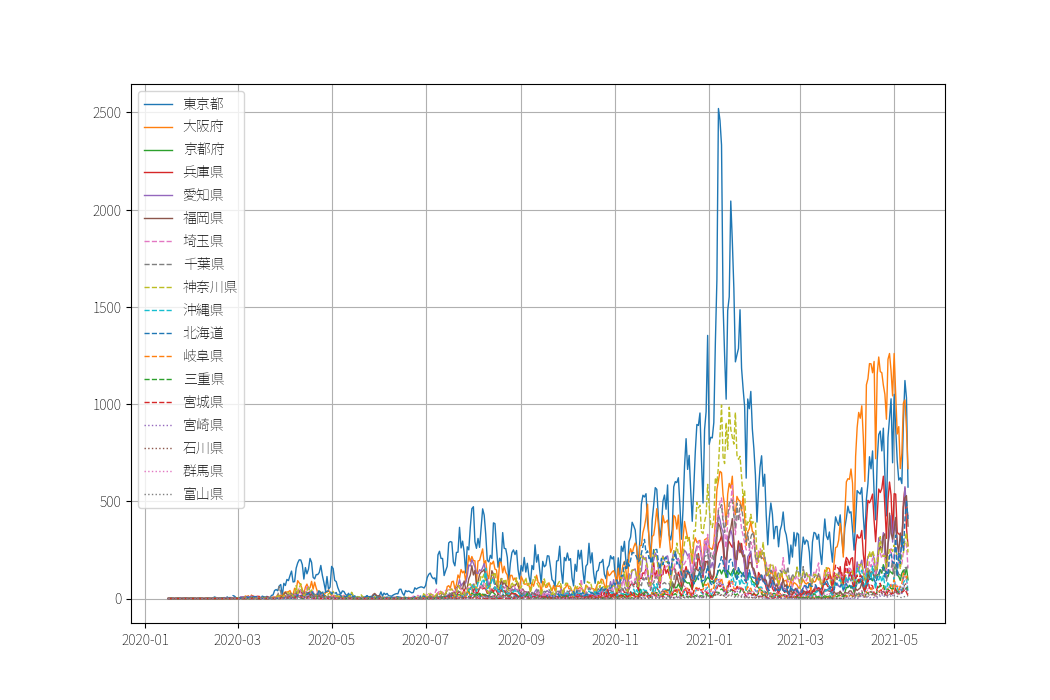

In [10]:
plt.figure(figsize=(10.5,7))
dates = pref["日付"].unique()
for p in prefs:
    plt.plot_date(dates,pref.loc[pref["都道府県名"]==p]["各地の感染者数_1日ごとの発表数"],label=p, fmt=prefs[p][0], lw=prefs[p][1])
plt.grid()
plt.legend()

<IPython.core.display.Javascript object>


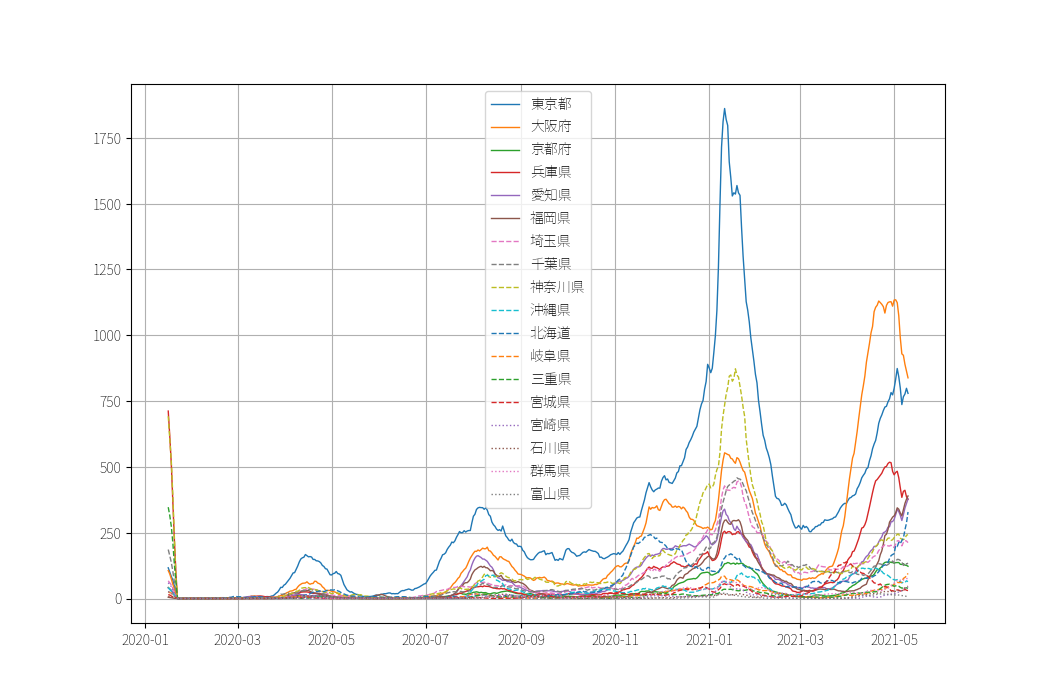

In [11]:
plt.figure(figsize=(10.5,7))
dates = pref["日付"].unique()
for p in prefs:
    plt.plot_date(dates,pref.loc[pref["都道府県名"]==p]["感染者数移動平均7"],label=p, fmt=prefs[p][0], lw=prefs[p][1])
plt.grid()
plt.legend()

<IPython.core.display.Javascript object>


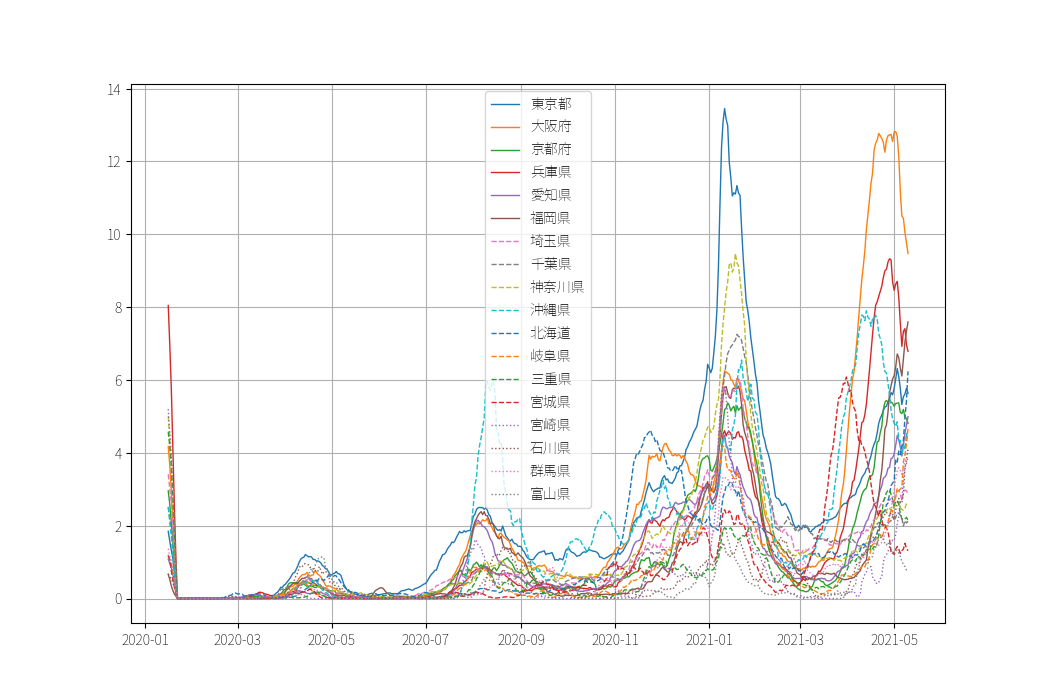

In [12]:
plt.figure(figsize=(10.5,7))
dates = pref["日付"].unique()
for p in prefs:
    plt.plot_date(dates,pref.loc[pref["都道府県名"]==p]["10万人あたり感染者数移動平均7"],label=p, fmt=prefs[p][0], lw=prefs[p][1])
plt.grid()
plt.legend()